In [ ]:
#Assignment7

Problem Statement1: Build a text classification RNN ( Recurrent Neural Network) model using IMDB dataset.

Import the IMDB dataset using tensorflow_datasets and perform the following tasks.

Tasks to be performed:
• Import the required libraries 
• Shuffle the data for training and create batches of text and label pairs 
• Encode the text data (Note: The simplest way to process text for training is using the Text Vectorization layer)
• Build a sequential model using tf.keras.Sequential function 
• Compile the model 
• Train the model using train dataset 
• Test the data using tset dataset and evaluate the model by passing a sentence

Note:If the prediction is >= 0.0, it is positive else it is negative.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)


In [4]:
type(dataset)

dict

In [5]:
dataset.keys()

dict_keys(['train', 'test', 'unsupervised'])

In [6]:
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [8]:
#Shuffle the data for training and create batches of text and label pairs

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [9]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'Four porn stars romping through the Irish woods sounds like a film to watch. We have Ginger Lynn Allen, Chasey Lain, Taylor Hayes, and Jenna Jameson all together in one film. Are you licking your lips? Well the mutant creatures who resulted from centuries of inbreeding were certainly licking their lips as they feasted on the entrails of their victims.<br /><br />Yes, there was some flesh exposed - far too little considering the cast - but, it was soon ripped open to expose dinner for these creatures. There was definitely some action that probably has not been seen before, and more than one person lost their head in the situation.<br /><br />Unfortunately, director Christian Viel did not show much promise and I am not likely to watch his later efforts.'
 b"Where to start? OK, don't compare this film to fight club for a start - ridiculous. If it was even a patch on fight club, the violence, blood, gore etc would be much more evident and realistic. Secondly, this film is no foo

In [11]:
#Encode the text data

encoder = tf.keras.layers.TextVectorization(
    max_tokens=1000)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [12]:
vocab = np.array(encoder.get_vocabulary())
vocab

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but',
       'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be',
       'one', 'its', 'at', 'all', 'by', 'an', 'they', 'from', 'who', 'so',
       'like', 'her', 'just', 'or', 'about', 'has', 'if', 'out', 'some',
       'there', 'what', 'good', 'when', 'more', 'very', 'even', 'she',
       'my', 'no', 'up', 'would', 'which', 'only', 'time', 'really',
       'story', 'their', 'were', 'had', 'see', 'can', 'me', 'than', 'we',
       'much', 'well', 'been', 'get', 'will', 'into', 'also', 'because',
       'other', 'do', 'people', 'bad', 'great', 'first', 'how', 'most',
       'him', 'dont', 'made', 'then', 'movies', 'make', 'films', 'could',
       'way', 'them', 'any', 'too', 'after', 'characters', 'think',
       'watch', 'two', 'many', 'being', 'seen', 'character', 'never',
       'little', 'acting', 'where', 'plot', 'best', 'love', 'did'

In [13]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[709,   1, 390, ...,   0,   0,   0],
       [113,   6, 369, ...,   0,   0,   0],
       [ 10,  14, 558, ...,   0,   0,   0]], dtype=int64)

In [14]:
#Build a sequential model using tf.keras.Sequential function

model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [15]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [16]:
# Compile the model

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [17]:
# Train the model using train dataset

history = model.fit(train_dataset, epochs=5,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/5



391/391 [==============================] - 962s 2s/step - loss: 0.6348 - accuracy: 0.5663 - val_loss: 0.5936 - val_accuracy: 0.5250
Epoch 2/5
391/391 [==============================] - 967s 2s/step - loss: 0.4452 - accuracy: 0.7768 - val_loss: 0.3897 - val_accuracy: 0.8203
Epoch 3/5
391/391 [==============================] - 1101s 3s/step - loss: 0.3531 - accuracy: 0.8430 - val_loss: 0.3559 - val_accuracy: 0.8313
Epoch 4/5
391/391 [==============================] - 1086s 3s/step - loss: 0.3275 - accuracy: 0.8563 - val_loss: 0.3357 - val_accuracy: 0.8505
Epoch 5/5
391/391 [==============================] - 1074s 3s/step - loss: 0.3149 - accuracy: 0.8637 - val_loss: 0.3426 - val_accuracy: 0.8568


In [27]:
#Test the data using test dataset

test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 106s 271ms/step - loss: 0.3355 - accuracy: 0.8616
Test Loss: 0.3354829251766205
Test Accuracy: 0.8616399765014648


(0.0, 0.650755624473095)

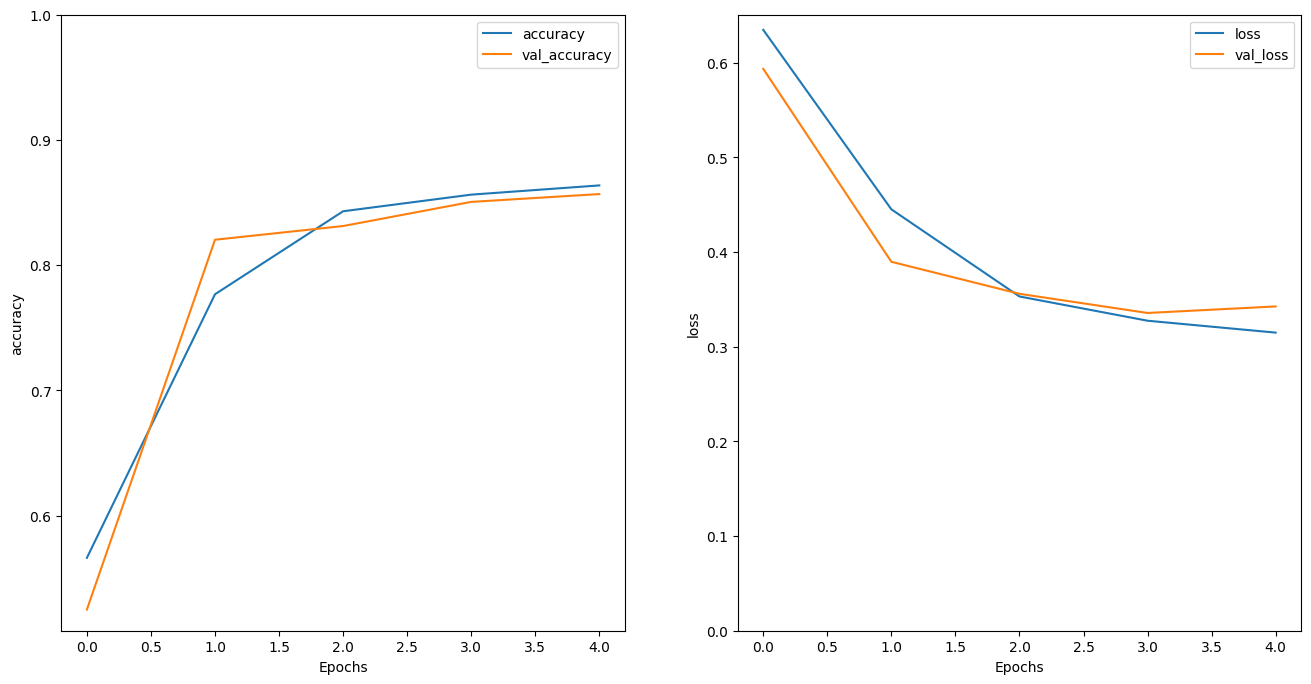

In [28]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])


plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [31]:
#evaluate the model by passing a sentence

#pass a positive review
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 0s 44ms/step
[1.092309]


In [33]:
#pass a negative review
sample_text = ('The movie was disgusting. Terrible acting and direction.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 0s 36ms/step
[-1.1025724]


Problem Statement2: Sumanth wants to build an flowers image classification CNN model which can take a flower image as input and prints the name of flower.

Dataset Description: 

The dataset consistof 3,700 photos of flowers. 

The dataset contains five sub-directories, one per class:
•daisy
•dandelion
•roses
•sunflowers
•tulips

Tasks to be performed:

•Import all the required libraries
•Download the flowers data from URL: 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz' using the Keras; and analyzing the images present in the dataset visualization
•Prepare the data by specifying the image resolution and batch size. Also, Splitting the dataset into training and validation datasets in 80:20 ratio
•Plot a sample image attributed to each class name present in the original dataset.
•Autotune the data using cache().shuffle().prefetch() function; Also, normalize the data by deviding it with a number
•Build a sequential CNN model
•Compile the modeland print model summary
•Train and validate the model and plot the validation results using a line plot
•Feed the system with an image of a flower and print the prediction along with the accuracy

In [44]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2 
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import pathlib


In [42]:
#Download the flowers data 

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/827180/.keras/datasets/flower_photos')

In [39]:
img_size = 224
batch = 64

In [45]:
#Splitting the dataset into training and validation datasets in 80:20 ratio

# Create a data augmentor 
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, 
								zoom_range=0.2, horizontal_flip=True, 
								validation_split=0.2) 

test_datagen = ImageDataGenerator(rescale=1. / 255, 
								validation_split=0.2) 

# Create datasets 
train_datagen = train_datagen.flow_from_directory(data_dir, 
												target_size=( 
													img_size, img_size), 
												subset='training', 
												batch_size=batch) 
test_datagen = test_datagen.flow_from_directory(data_dir, 
												target_size=( 
													img_size, img_size), 
												subset='validation', 
												batch_size=batch)


Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [47]:
#Build a sequential CNN model

# # modelling starts using a CNN. 

model = Sequential() 
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', 
				activation='relu', input_shape=(224, 224, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 


model.add(Conv2D(filters=64, kernel_size=(3, 3), 
				padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 


model.add(Conv2D(filters=64, kernel_size=(3, 3), 
				padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 

model.add(Conv2D(filters=64, kernel_size=(3, 3), 
				padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu')) 
model.add(Dense(5, activation="softmax")) 


In [48]:
#print model summary

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 28, 28, 64)       

In [49]:
#Compile the model

model.compile(optimizer=tf.keras.optimizers.Adam(), 
			loss='categorical_crossentropy', metrics=['accuracy']) 


In [50]:
#Model Fitting

model.fit(train_datagen,epochs=5,validation_data=test_datagen)


Epoch 1/5
46/46 [==============================] - 279s 6s/step - loss: 1.4439 - accuracy: 0.3811 - val_loss: 1.2967 - val_accuracy: 0.4843
Epoch 2/5
46/46 [==============================] - 283s 6s/step - loss: 1.0939 - accuracy: 0.5584 - val_loss: 1.0898 - val_accuracy: 0.5828
Epoch 3/5
46/46 [==============================] - 287s 6s/step - loss: 0.9853 - accuracy: 0.6230 - val_loss: 1.5556 - val_accuracy: 0.4938
Epoch 4/5
46/46 [==============================] - 286s 6s/step - loss: 0.9285 - accuracy: 0.6441 - val_loss: 1.1360 - val_accuracy: 0.5896
Epoch 5/5
46/46 [==============================] - 280s 6s/step - loss: 0.8548 - accuracy: 0.6737 - val_loss: 0.9691 - val_accuracy: 0.6156


In [51]:
#Model Evaluation and Prediction

train_datagen.class_indices


{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

1/1 [==============================] - 0s 39ms/step
[[0. 0. 0. 1. 0.]]
Sunflower


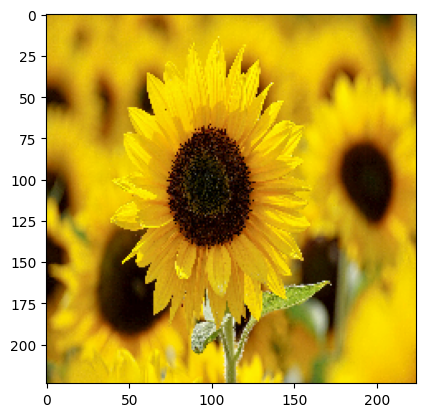

In [58]:
from keras.preprocessing import image 

#Creating list for mapping 
list_ = ['Daisy','Dandelion','Rose','Sunflower', 'Tulip'] 

#Input image 
test_image = image.load_img('sunflower.jpg',target_size=(224,224)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = model.predict(test_image) 
print(result) 

#Mapping result array with the main name list 
i=0
for i in range(len(result[0])): 
 if(result[0][i]==1): 
     print(list_[i]) 
     break


1/1 [==============================] - 0s 63ms/step
[[1. 0. 0. 0. 0.]]
Daisy


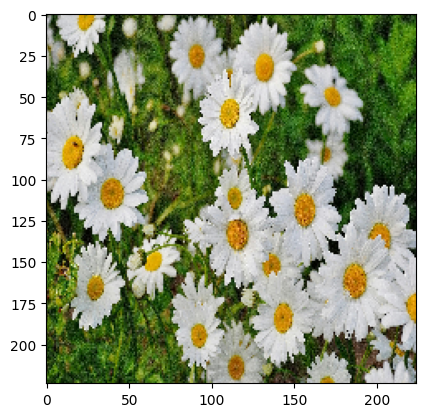

In [59]:
#Input image(2) 
test_image = image.load_img('daisy.jpg',target_size=(224,224)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = model.predict(test_image) 
print(result) 

#Mapping result array with the main name list 
i=0
for i in range(len(result[0])): 
 if(result[0][i]==1): 
     print(list_[i]) 
     break

1/1 [==============================] - 0s 76ms/step
[[0. 0. 1. 0. 0.]]
Rose


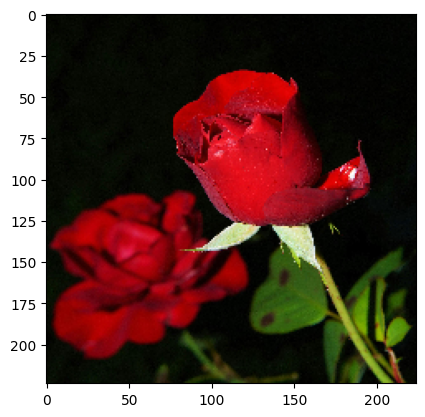

In [61]:
#Input image(3) 
test_image = image.load_img('rose.jpg',target_size=(224,224)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = model.predict(test_image) 
print(result) 

#Mapping result array with the main name list 
i=0
for i in range(len(result[0])): 
 if(result[0][i]==1): 
     print(list_[i]) 
     break